## MNIST 손글씨 다중분류 - FCN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed =2023
np.random.seed(seed)
tf.random.set_seed(seed)
import warnings
warnings.filterwarnings('ignore')

- 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

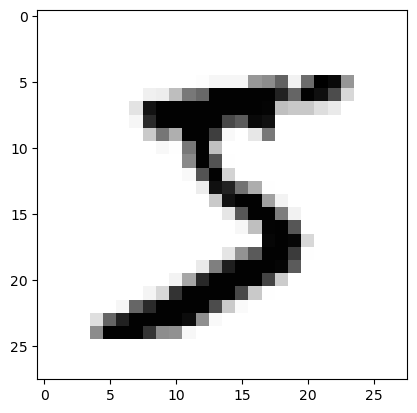

In [5]:
plt.imshow(X_train[0], cmap='Greys');
# y값은 5

In [6]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [7]:
# X scaling
# 이미지 데이터는 0 ~ 1 사이의 값으로 스케일링
X_train = X_train / 255.
X_test = X_test / 255.


In [8]:
# Fully Connected Network(Dense layer)은 1차원 데이터만 처리 가능하므로 차원 축소
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# y 값의 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [10]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [11]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
model = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 48)                12336     
                                                                 
 dense_3 (Dense)             (None, 10)                490       
                                                                 
Total params: 1054082 (4.02 MB)
Trainable params: 105408

In [14]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
mc = ModelCheckpoint('models/best_mnist.h5', verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=256, verbose=1,
                 callbacks=[mc,es])

Epoch 1/100
187/188 [============================>.] - ETA: 0s - loss: 0.3604 - accuracy: 0.8908
Epoch 1: val_loss improved from inf to 0.13464, saving model to models\best_mnist.h5
188/188 [==============================] - 6s 30ms/step - loss: 0.3600 - accuracy: 0.8909 - val_loss: 0.1346 - val_accuracy: 0.9599
Epoch 2/100
187/188 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9600
Epoch 2: val_loss improved from 0.13464 to 0.10157, saving model to models\best_mnist.h5
188/188 [==============================] - 5s 27ms/step - loss: 0.1295 - accuracy: 0.9600 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 3/100
187/188 [============================>.] - ETA: 0s - loss: 0.0887 - accuracy: 0.9722
Epoch 3: val_loss improved from 0.10157 to 0.08698, saving model to models\best_mnist.h5
188/188 [==============================] - 5s 27ms/step - loss: 0.0886 - accuracy: 0.9722 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 4/100
186/188 [============================>

In [16]:
best_model = load_model('models/best_mnist.h5')
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.9818


[0.06717586517333984, 0.9818000197410583]

- 시각화

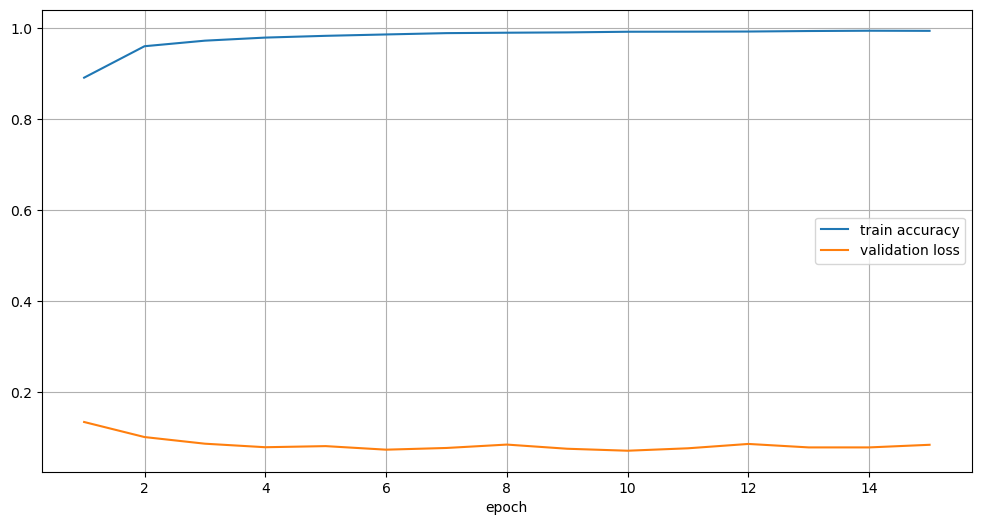

In [17]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

In [21]:
model2 = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dense_9 (Dense)             (None, 256)               256256    
                                                                 
 dense_10 (Dense)            (None, 48)                12336     
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 1054082 (4.02 MB)
Trainable params: 1054082 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model2.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
mc2 = ModelCheckpoint('models/best_mnist.h5', verbose=1, save_best_only=True)
es2 = EarlyStopping(patience=5)
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=256, verbose=1,
                 callbacks=[mc,es])

Epoch 1/100
186/188 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.9159
Epoch 1: val_loss did not improve from 0.07155
188/188 [==============================] - 5s 22ms/step - loss: 0.2903 - accuracy: 0.9162 - val_loss: 0.1341 - val_accuracy: 0.9613
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9709
Epoch 2: val_loss did not improve from 0.07155
188/188 [==============================] - 4s 22ms/step - loss: 0.0983 - accuracy: 0.9709 - val_loss: 0.0927 - val_accuracy: 0.9709
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9822
Epoch 3: val_loss did not improve from 0.07155
188/188 [==============================] - 4s 21ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 4/100
188/188 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9880
Epoch 4: val_loss did not improve from 0.07155
188/188 [===================

In [24]:
best_model2 = load_model('models/best_mnist.h5')
best_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9818


[0.06717586517333984, 0.9818000197410583]

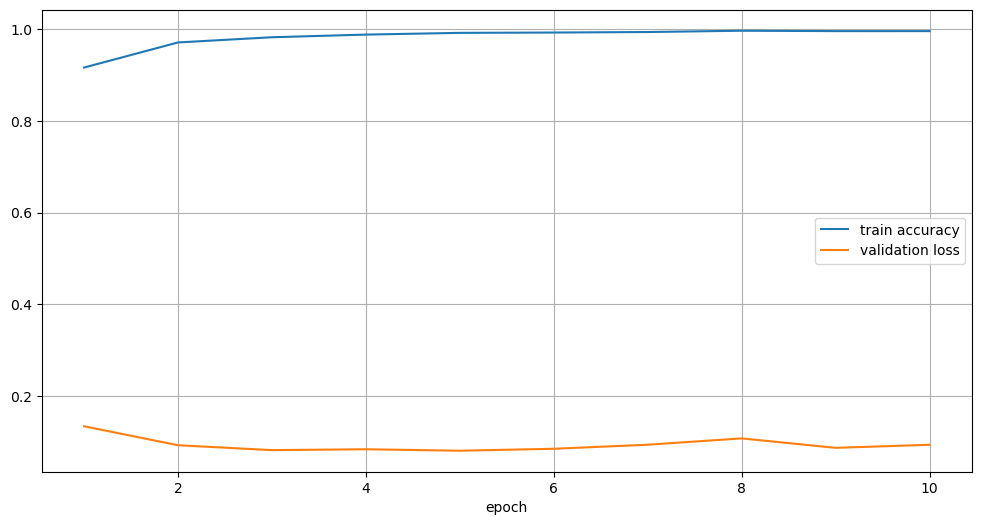

In [25]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

plt.figure(figsize=(12,6))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()